# Исследование надёжности заёмщиков

## Шаг 1. Загрузка и изучение данных

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv('/datasets/data.csv')

In [153]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


**Выводы**

Каждая строка таблицы содержит информацию о платёжеспособности клиента. Для проверки рабочих гипотез особенно ценны столбцы children, family_status, total_income и debt. Есть проблемы, которые нужно решать: пропуски, отрицательные значения в столбце days_employed и значения в разном регистре в столбце education. Так же в стобце days_employed есть значение, похожее на ошибку - 340266 (если перевести в года, это 932 года, а столько не живут:)).

## Шаг 2. Предобработка данных

### Обработка пропусков

На этапе ознакомления с данными было замечено, что в столбце с уровнем образования есть повторяющиеся данные, записанные в разном регистре. Посмотрим все уникальные значения этого столбца и приведём их к одному регистру. Тоже самое проделаем в столбце family_status, в котором тоже встречается эта проблема. И потом проверим, что получилось.

In [155]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

In [156]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [157]:
df['education'] = df['education'].str.lower()

In [158]:
df['family_status'] = df['family_status'].str.lower()

In [159]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [160]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В данных есть пропуски в двух столбцах - общий трудовой стаж и ежемесячный доход. Похоже на ошибку при записи данных, возможно клиенты не предоставили банку трудовую книгу и соответственно информацию о своём стаже и доходе. Тип данных обоих столбцов - float. Тип переменных - количественные. 

Сгруппируем данные по типу занятости и образованию клиентов и посчитаем медианы для ежемесячного дохода по сгруппированным данным.

In [161]:
df.groupby(['income_type', 'education'])['total_income'].median()

income_type      education          
безработный      высшее                 202722.511368
                 среднее                 59956.991984
в декрете        среднее                 53829.130729
госслужащий      высшее                 172511.107016
                 начальное              148339.290825
                 неоконченное высшее    160592.345303
                 среднее                136652.970357
                 ученая степень         111392.231107
компаньон        высшее                 201785.400018
                 начальное              136798.905143
                 неоконченное высшее    179867.152890
                 среднее                159070.690289
пенсионер        высшее                 144240.768611
                 начальное              102598.653164
                 неоконченное высшее    120136.896353
                 среднее                114842.854099
                 ученая степень         177088.845999
предприниматель  высшее                 49916

Заменим пропущенные значения в столбце с ежемесячным доходом на медианы, которые мы рассчитали выше.

In [162]:
df['total_income'] = df.groupby(['income_type', 'education'])['total_income'].apply(lambda x: x.fillna(x.median()))

In [163]:
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
dtype: int64

В столбце со стажем помимо пропущенных значений встречаются отрицательные и слишком большие. Отрицательные очень похожи на реальные значения, в отличие от слишком больших. Напишем функцию для избавления от отрицательных значений, применим её к столбцу со стажем и добавим получившиеся значения в новый столбец. Функция будет содержать конструкцию для обработки потенциальных ошибок.

In [164]:
df['days_employed_recoded'] = df['days_employed']

In [165]:
def recode_negative(row):
    error_count = 0
    try:
        i = row['days_employed_recoded']
        if i < 0:
            i = i*-1
        return i
    except:
        error_count+=1

In [166]:
df['days_employed_recoded'] = df.apply(recode_negative, axis=1)

In [167]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_recoded
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,8437.673028
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,4024.803754
2,0,-5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,5623.422610
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,4124.747207
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,340266.072047


Изучим подробнее записи таблицы, в которых встречается такой артефакт, как например значение 340266,07. Построим гистограмму и посмотрим на распределение значений этого стобца.

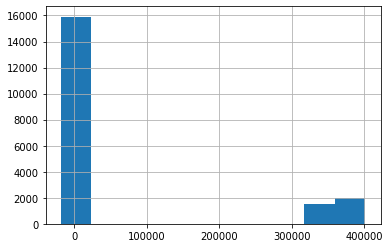

In [168]:
df['days_employed'].hist()

Посмотрим, сколько всего значений больше 300000 и выведем их.

In [169]:
df[df['days_employed'] > 300000]['days_employed'].count()

3445

In [171]:
df[df['days_employed'] > 300000].head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,days_employed_recoded
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,340266.072047
18,0,400281.136913,53,среднее,1,вдовец / вдова,2,F,пенсионер,0,56823.777243,на покупку подержанного автомобиля,400281.136913
24,1,338551.952911,57,среднее,1,не женат / не замужем,4,F,пенсионер,0,290547.235997,операции с коммерческой недвижимостью,338551.952911
25,0,363548.489348,67,среднее,1,женат / замужем,0,M,пенсионер,0,55112.757732,покупка недвижимости,363548.489348
30,1,335581.668515,62,среднее,1,женат / замужем,0,F,пенсионер,0,171456.067993,операции с коммерческой недвижимостью,335581.668515
35,0,394021.072184,68,среднее,1,гражданский брак,1,M,пенсионер,0,77805.677436,на проведение свадьбы,394021.072184
50,0,353731.432338,63,среднее,1,женат / замужем,0,F,пенсионер,0,92342.730612,автомобили,353731.432338
56,0,370145.087237,64,среднее,1,вдовец / вдова,2,F,пенсионер,0,149141.043533,образование,370145.087237
71,0,338113.529892,62,среднее,1,женат / замужем,0,F,пенсионер,0,43929.696397,автомобили,338113.529892
78,0,359722.945074,61,высшее,0,женат / замужем,0,M,пенсионер,0,175127.646000,сделка с автомобилем,359722.945074


По тем строкам, которые мы видим мы можем заметить, что в стобце типа занятости у всех указано 'пенсионер'. Посмотрим, у каких типов занятости ещё встречаются такие значения.

In [172]:
df_q = df[df['days_employed'] > 300000]

In [173]:
df_q.groupby('income_type')['days_employed'].count()

income_type
безработный       2
пенсионер      3443
Name: days_employed, dtype: int64

Мы видим, что значения трудового стажа более 300000 дней встречаются только у пенсионеров и у двоих безработных. Тк практически все эти значения принадлежат 'пенсионерам', то можно предположить, что стаж указан в часах, а не в днях.

Мы не знаем причину появления этих значений, а для проверки рабочих гипотез в нашей задаче этот столбец мы использовать не будем, поэтому оставим эти значения как есть.

Из всех параметров, что мы имеем в данных стаж вероятнее всего может зависить от возраста человека. Разделим наши данные по столбцу dob_years на примерно равные группы по количествую записей.

In [174]:
df['dob_years_cut'] = pd.qcut(df['dob_years'], 5)

In [175]:
df.groupby('dob_years_cut')['days_employed'].agg(['count'])

,count
dob_years_cut,
"(-0.001, 31.0]",3952
"(31.0, 39.0]",4132
"(39.0, 47.0]",3884
"(47.0, 56.0]",3909
"(56.0, 75.0]",3474


Заменим пропущенные значения в days_employed на медианы, взятые по возрастным группам.

In [176]:
df['days_employed_recoded'] = df.groupby(['dob_years_cut'])['days_employed_recoded'].apply(lambda x: x.fillna(x.median()))

Запишем все значения нового столбца со стажем в исходный стобдец, а новый удалим.

In [177]:
df['days_employed'] = df['days_employed_recoded']

In [178]:
df.isnull().sum()

children                 0
days_employed            0
dob_years                0
education                0
education_id             0
family_status            0
family_status_id         0
gender                   0
income_type              0
debt                     0
total_income             0
purpose                  0
days_employed_recoded    0
dob_years_cut            0
dtype: int64

In [179]:
df.drop('days_employed_recoded', axis=1, inplace=True)

In [180]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cut
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,"(39.0, 47.0]"
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,"(31.0, 39.0]"
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,"(31.0, 39.0]"
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,"(31.0, 39.0]"
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,"(47.0, 56.0]"


**Вывод**

В данных о трудовом стаже и ежемесячном доходе клиентов банка были обнаружены пропущенные значения. Это количественные переменные и пропуски в них обычно заменяют на медиану или среднее значение, поэтому в стобце с ежемесячным доходом пропуски были заменены на медианы, взятые по группам в зависимости от образования и типа занятости клиента. В данных с трудовым стажем мы встрелились с артефактами: отрицательными значениями и значениями, которые не соответствуют реальности. Трудовой стаж с  значениями больше 300000 встретился только у 'пенсионеров', что позволило предположить, что для них данные записались по другому принципу. Пропуски в данных о трудовом стаже заполнены на медианы, взятые по группам, в зависимости от возраста клиента.

### Замена типа данных

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null float64
purpose             21525 non-null object
dob_years_cut       21525 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Мы видим, что значения столбца days_employed  и total_income  имеют тип данных float64. Для перевода этих значений в нужный нам тип int64 воспользуемся методом astype().

In [182]:
df['days_employed'] = df['days_employed'].astype('int')

In [183]:
df['total_income'] = df['total_income'].astype('int')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
children            21525 non-null int64
days_employed       21525 non-null int64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        21525 non-null int64
purpose             21525 non-null object
dob_years_cut       21525 non-null category
dtypes: category(1), int64(7), object(5)
memory usage: 2.0+ MB


**Вывод**

Была произведена замена типов данных для столбцов days_employed и total_income. Вещественный тип данных был заменён на целочисленный.

### Обработка дубликатов

In [185]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cut
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"(39.0, 47.0]"
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"(31.0, 39.0]"
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"(31.0, 39.0]"
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"(31.0, 39.0]"
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"(47.0, 56.0]"


Необходимо установить наличие дубликатов.  Если найдутся, удаляем, и проверяем, все ли удалились.

In [186]:
df.duplicated().sum()

71

In [187]:
df = df.drop_duplicates().reset_index(drop = True)

In [188]:
df.duplicated().sum()

0

**Вывод**

Дубликаты могли появиться вследствие сбоя в записи данных. Их удаление позволит провести анализ точнее. 

### Лемматизация

In [189]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Столбец purpose — цель получения кредита нам нужен для ответа на поставленный вопрос о том, как разные цели кредита влияют на его возврат в срок. Выше мы видим список уникальных значений этого стобца и можем заметить, что цели получения кредита можно объединить в группы. Для того, чтобы понять, какие группы лучше создать нам понадобиться лемматизация.

In [190]:
from pymystem3 import Mystem

In [191]:
m = Mystem()

Мы возьмём список уникальных значений из purpose, пройдём по нему в цикле и получим для каждого лемму. Далее получим частоту появления каждой из лемм, визуально проанализируем и выделим несколько основных целей
кредита, для которых есть характерные слова в лемме.

In [192]:
purpose_list = df['purpose'].unique()

In [193]:
lemmas = []

In [194]:
for b in purpose_list:
    lemma = ' '.join(m.lemmatize(b))
    lemmas.append(lemma)

In [195]:
lemmas

['покупка   жилье \n',
 'приобретение   автомобиль \n',
 'дополнительный   образование \n',
 'сыграть   свадьба \n',
 'операция   с   жилье \n',
 'образование \n',
 'на   проведение   свадьба \n',
 'покупка   жилье   для   семья \n',
 'покупка   недвижимость \n',
 'покупка   коммерческий   недвижимость \n',
 'покупка   жилой   недвижимость \n',
 'строительство   собственный   недвижимость \n',
 'недвижимость \n',
 'строительство   недвижимость \n',
 'на   покупка   подержать   автомобиль \n',
 'на   покупка   свой   автомобиль \n',
 'операция   с   коммерческий   недвижимость \n',
 'строительство   жилой   недвижимость \n',
 'жилье \n',
 'операция   со   свой   недвижимость \n',
 'автомобиль \n',
 'заниматься   образование \n',
 'сделка   с   подержанный   автомобиль \n',
 'получение   образование \n',
 'автомобиль \n',
 'свадьба \n',
 'получение   дополнительный   образование \n',
 'покупка   свой   жилье \n',
 'операция   с   недвижимость \n',
 'получение   высокий   образование \n',

In [196]:
from collections import Counter

In [197]:
Counter(lemmas)

Counter({'покупка   жилье \n': 1,
         'приобретение   автомобиль \n': 1,
         'дополнительный   образование \n': 1,
         'сыграть   свадьба \n': 1,
         'операция   с   жилье \n': 1,
         'образование \n': 1,
         'на   проведение   свадьба \n': 1,
         'покупка   жилье   для   семья \n': 1,
         'покупка   недвижимость \n': 1,
         'покупка   коммерческий   недвижимость \n': 1,
         'покупка   жилой   недвижимость \n': 1,
         'строительство   собственный   недвижимость \n': 1,
         'недвижимость \n': 1,
         'строительство   недвижимость \n': 1,
         'на   покупка   подержать   автомобиль \n': 1,
         'на   покупка   свой   автомобиль \n': 1,
         'операция   с   коммерческий   недвижимость \n': 1,
         'строительство   жилой   недвижимость \n': 1,
         'жилье \n': 1,
         'операция   со   свой   недвижимость \n': 1,
         'автомобиль \n': 2,
         'заниматься   образование \n': 1,
         'сделка   с

Мы увидели, что основные цели кредита можно разделить на 4 группы:
- автомобиль
- недвижимость
- образование
- свадьба

Напишем функцию, которая:
- лемматизирует очередную цель
- последовательно проверяет лемму на наличие ключевых слов
- возвращает соответствующую укрупнённую цель кредита.

Применим эту функцию к столбцу purpose и запишем в результат в новый столбец purpose_cat.
Потом сохраним результат в столбец purpose  и удалим столбец purpose_cat.

In [198]:
def loan_purpose(row):
    lemmas = m.lemmatize(row)
    if 'автомобиль' in lemmas:
        return 'автомобиль'    
    elif ('жилье' in lemmas) or ('недвижимость' in lemmas):
        return 'недвижимость'
    elif 'образование' in lemmas: 
        return 'образование'
    elif 'свадьба' in lemmas:
        return 'свадьба'
    else:
        return 'Другие цели' 

In [199]:
df['purpose_cat'] = df['purpose'].apply(loan_purpose)

In [200]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cut,purpose_cat
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,"(39.0, 47.0]",недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,"(31.0, 39.0]",автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,"(31.0, 39.0]",недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,"(31.0, 39.0]",образование
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,"(47.0, 56.0]",свадьба


In [201]:
df['purpose'] = df['purpose_cat']

In [202]:
df.drop('purpose_cat', axis=1, inplace=True)

In [203]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cut
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость,"(39.0, 47.0]"
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,"(31.0, 39.0]"
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость,"(31.0, 39.0]"
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,"(31.0, 39.0]"
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,"(47.0, 56.0]"


**Вывод**

С помощью лемманизации в столбце purpose были выделены и объединены в смысловые группы цели кредита. Получилось 4 цели: автомобиль, недвижимость, образование, свадьба. Столбец purpose перезаписан с ипользованием полученных целей. Теперь данные готовы для анализа.

### Категоризация данных

In [204]:
df.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose', 'dob_years_cut'],
      dtype='object')

Если посмотреть на список столбцов наших данных можно заменить, что некоторые данные избыточны. А именно столбцы 'education' и 'education_id', а так же столбцы 'family_status' и 'family_status_id' по сути дублируют информацию. Мы можем оставить в таблице только 'education_id' и 'family_status_id', а расшифровку сохранить в соответствующем словаре.

In [205]:
df_fam_status = df[['children','days_employed', 'dob_years','education', 'education_id', 'family_status_id', 'gender', 'income_type', 'debt', 'total_income', 'purpose'   ]]

In [206]:
df_dict_fam_status = df[['family_status_id','family_status']]

In [207]:
df_dict_fam_status.head(10)

,family_status_id,family_status
0,0,женат / замужем
1,0,женат / замужем
2,0,женат / замужем
3,0,женат / замужем
4,1,гражданский брак
5,1,гражданский брак
6,0,женат / замужем
7,0,женат / замужем
8,1,гражданский брак
9,0,женат / замужем


Удалив в словаре дубликаты мы получаем таблицу с расшифровкой, гда кжадому id соответствует семейный статус.

In [208]:
df_dict_fam_status = df_dict_fam_status.drop_duplicates().reset_index(drop=True)

In [209]:
df_dict_fam_status.head(10)

,family_status_id,family_status
0,0,женат / замужем
1,1,гражданский брак
2,2,вдовец / вдова
3,3,в разводе
4,4,не женат / не замужем


In [210]:
df_education = df[['children','days_employed', 'dob_years','education_id', 'family_status_id', 'gender', 'income_type', 'debt', 'total_income', 'purpose'   ]]

Точно так же поступим и в случае  'education' и 'education_id'.

In [211]:
df_dict_education = df[['education_id','education']]

In [212]:
df_dict_education.head(10)

,education_id,education
0,0,высшее
1,1,среднее
2,1,среднее
3,1,среднее
4,1,среднее
5,0,высшее
6,0,высшее
7,1,среднее
8,0,высшее
9,1,среднее


In [213]:
df_dict_education = df_dict_education.drop_duplicates().reset_index(drop=True)

In [214]:
df_dict_education.head(10)

,education_id,education
0,0,высшее
1,1,среднее
2,2,неоконченное высшее
3,3,начальное
4,4,ученая степень


In [215]:
df_education.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,0,0,F,сотрудник,0,253875,недвижимость
1,1,4024,36,1,0,F,сотрудник,0,112080,автомобиль
2,0,5623,33,1,0,M,сотрудник,0,145885,недвижимость
3,3,4124,32,1,0,M,сотрудник,0,267628,образование
4,0,340266,53,1,1,F,пенсионер,0,158616,свадьба


**Вывод**

Мы увидели в таблице данные, для которых в одном столбце хранится строковое значение, а в другом его соответствующее id. При анализе удобнее работать с id, поэтому мы убрали расшифровку 'education_id' и 'family_status_id' в отдельные таблицы и получили таблицу без строковых значений этих столбцов, только с id.

## Шаг 3. Анализ данных

### Есть ли зависимость между наличием детей и возвратом кредита в срок?

Посмотрим, какие уникальные значения в столбце с количеством детей есть и сколько с ними записей.

In [216]:
df.groupby('children')['debt'].value_counts()

children  debt
-1        0          46
          1           1
 0        0       13028
          1        1063
 1        0        4364
          1         444
 2        0        1858
          1         194
 3        0         303
          1          27
 4        0          37
          1           4
 5        0           9
 20       0          68
          1           8
Name: debt, dtype: int64

Сразу видно, что есть значение, очень похожее на ошибку при вводе данных. Исправим эти значения с помощью функции, которая возвращает модуль числа, применим её к столбцу children и проверим, как всё сработало.

In [217]:
df['children'] = df['children'].abs()

In [218]:
df.groupby('children')['debt'].value_counts()

children  debt
0         0       13028
          1        1063
1         0        4410
          1         445
2         0        1858
          1         194
3         0         303
          1          27
4         0          37
          1           4
5         0           9
20        0          68
          1           8
Name: debt, dtype: int64

Для ответа на вопрос, есть ли зависимость между наличием детей и возвратом кредита в срок разделим все значения количества детей на две группы: 0 - у кого нет детей и >0 - если дети есть. Напишем функцию, применим её к столбцу children_recoded и запишем результат в новый столбец children_group. Затем сгруппируем данные по новому столбцу, посчитаем количество значений, сумму и долю должников.

In [219]:
def children_group(children):
        if children == 0:
                return 'без детей'
        return 'с детьми'

In [220]:
df['children_group'] = df['children'].apply(children_group)

In [221]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,dob_years_cut,children_group
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость,"(39.0, 47.0]",с детьми
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль,"(31.0, 39.0]",с детьми
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость,"(31.0, 39.0]",без детей
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование,"(31.0, 39.0]",с детьми
4,0,340266,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба,"(47.0, 56.0]",без детей


In [222]:
df.groupby('children_group')['debt'].agg(['count', 'sum', 'mean'])

,count,sum,mean
children_group,,,
без детей,14091,1063,0.075438
с детьми,7363,678,0.092082


**Вывод**

Оказалось, что процент должников среди людей с детьми больше, чем среди людей без детей. Возможно это связвно с тем, что наличие детей предполагает больше непредвиденных расходов, что может приводить к появлению задолженностей по кредитам.

### Есть ли зависимость между семейным положением и возвратом кредита в срок?

Вспомним полученную нами расшифровку значений семейного положения и напишем функцию, которая в качестве аргумента будет получать id и если id=0 или id=1, будет возвращать значение 'с парой', а в остальных 'без пары'. Затем применим функцию к столбцу family_status_id, результат запишем в новый столбец family_status_id_group. 

In [223]:
def family_status_id_group(id):
        if id <= 1:
                return 'с парой'
        return 'без пары'

In [224]:
df['family_status_id_group'] = df['family_status_id'].apply(family_status_id_group)

Сгруппируем данные но новому столбцу, посчитаем количество, сумму и долю должников.

In [225]:
df.groupby('family_status_id_group')['debt'].agg(['count', 'sum', 'mean'])

,count,sum,mean
family_status_id_group,,,
без пары,4964,422,0.085012
с парой,16490,1319,0.079988


In [226]:
df.groupby('family_status')['debt'].agg(['count', 'sum', 'mean'])

,count,sum,mean
family_status,,,
в разводе,1195,85,0.071130
вдовец / вдова,959,63,0.065693
гражданский брак,4151,388,0.093471
женат / замужем,12339,931,0.075452
не женат / не замужем,2810,274,0.097509


**Вывод**

Должников меньше среди тех людей, чьё семейное положение предполагает наличие пары (женат / замужем или гражданский брак). Возможно эти люди более ответственно подходят к финансовым вопросам чем те, кто не состоит в отношениях.<br>
Однако если не объединять в группы "с парой" и "без пары", а рассмотреть все категории, то оказывается, что меньше всего должников встречается среди людей со статусом "вдовец/вдова", возможно это связано с тем, что они зачастую получают наследство. Затем идут люди со статусом "разведён", затем "женат/замужем", а наибольшее количество должников среди не женатых/не замужних и людей, проживающих в гражданком браке. 

### Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Разделим наши данные по столбцу total_income (ежемесячный доход) на примерно равные группы по количествую записей, сгруппируем по новому столбцу и посчитаем количество, сумму и долю.

In [227]:
df['total_income_cut'] = pd.qcut(df['total_income'], 10)

In [228]:
df.groupby('total_income_cut')['debt'].agg(['count', 'sum', 'mean'])

,count,sum,mean
total_income_cut,,,
"(20666.999, 78721.1]",2146,157,0.073159
"(78721.1, 98537.6]",2145,187,0.087179
"(98537.6, 114842.0]",2323,197,0.084804
"(114842.0, 132542.8]",1968,162,0.082317
"(132542.8, 143707.5]",2145,209,0.097436
"(143707.5, 161304.0]",2145,177,0.082517
"(161304.0, 182463.2]",2146,178,0.082945
"(182463.2, 214618.2]",2145,174,0.081119
"(214618.2, 269825.5]",2145,149,0.069464


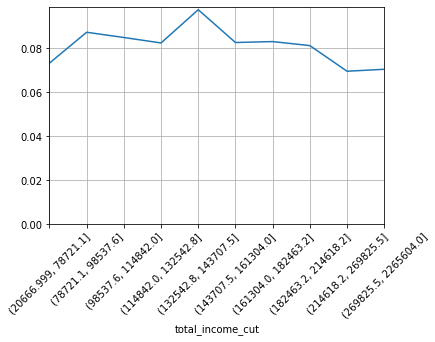

In [229]:
df.groupby('total_income_cut')['debt'].mean().plot(ylim=0, rot=45, grid=True)

**Вывод**

Люди с низким доходом и доходом выше среднего имеют меньше задолженностей, чем со средним доходом, но колебания доли задолжников небольшие (в рамках 2%). Возможно это связано с тем, что людям с низким доходом приходится тщательней прогнозировать расходы, а людям с доходом выше среднего реже приходится испытывать трудности с нехваткой денег. А люди со средним доходом могут в каких-то случаях не рассчитать свой бюджет и задержать выплату по кредиту.
   

### Как разные цели кредита влияют на его возврат в срок?

Обратимся к столюцу purpose, который мы обработали ранее. В неё значения разделены на 4 цели кредита: автомобиль, недвижимость, образование и свадьба. Сгруппируем по нему, посчитаем количество, сумму и долю задолженностей.

In [230]:
df.groupby('purpose')['debt'].agg(['count', 'sum', 'mean'])

,count,sum,mean
purpose,,,
автомобиль,4306,403,0.093590
недвижимость,10811,782,0.072334
образование,4013,370,0.092200
свадьба,2324,186,0.080034


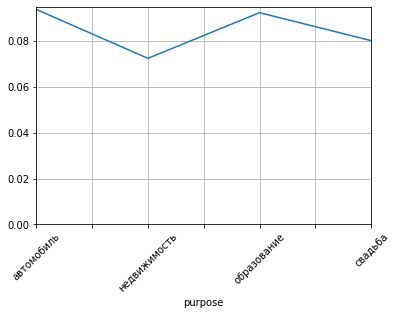

In [231]:
df.groupby('purpose')['debt'].mean().plot(ylim=0, rot=45, grid=True)

**Вывод**

Больше всего задолжников среди тех, кто берёт кредит на автомобиль. Затем идёт образование, а уже потом свадьба и наименьший процент у цели 'недвижимость'.
Возможно наименьшее количество задолженностей по кредитам на недвижемость связано с тем, что люди боятся лишиться жилья. А на свадьбу если берут кредит, то после свадьбы могут закрывать кредит подаренными деньгами.
А автомобиль и образование не являются предметами первой необходимости, в связи с чем финансовые приоритеты могут смещаться в другую сторону.
    

## Шаг 4. Общий вывод

Зависимость между наличием детей и возвратом кредита в срок есть: больше должников среди людей с детьми (9,2%), чем среди людей без детей (7,5%).<br>
На возврат кредита в срок повлияло и семейное положение: самыми надёжными клиентами банка оказались люди со статусом 'вдовец/вдова' (6,6% должников), затем идут люди со статусом "разведён" (7,1%), затем "женат/замужем" (7,5%), а наибольшее количество должников среди не женатых/не замужних (9,7%) и людей, проживающих в гражданком браке (9,3%).<br>
Что касается уровня дохода, то должников больше среди людей со средним доходом (8,8%), чем среди тех, у кого доход низкий (7,3%) или выше среднего (6,9%).<br>
Больше всего задолжников среди тех, кто берёт кредит на автомобиль (9,3%). Затем идёт образование (9,2%), а уже потом свадьба (8%) и меньше всего должников среди тех, кто брал кредит на недвижимость (7,2%).
